In [1]:
from autocvd import autocvd
autocvd(num_gpus = 1)


import os
import numpy as np

from chainconsumer import Chain, ChainConsumer, Truth
import pandas as pd


from odisseo.option_classes import SimulationParams, MNParams, NFWParams, PlummerParams, PSPParams
from odisseo.units import CodeUnits

from astropy import units as u

In [2]:
code_length = 10 * u.kpc
code_mass = 1e4 * u.Msun
code_time = 3 * u.Gyr
code_units = CodeUnits(code_length, code_mass, G=1, unit_time = code_time )  

# set the simulation parameters, we can differentiate with respect to these parameters
params = SimulationParams(t_end = (3 * u.Gyr).to(code_units.code_time).value,  
                          Plummer_params= PlummerParams(Mtot=(10**4.05 * u.Msun).to(code_units.code_mass).value,
                                                        a=(8 * u.pc).to(code_units.code_length).value),
                           MN_params= MNParams(M = (68_193_902_782.346756 * u.Msun).to(code_units.code_mass).value,
                                              a = (3.0 * u.kpc).to(code_units.code_length).value,
                                              b = (0.280 * u.kpc).to(code_units.code_length).value),
                          NFW_params= NFWParams(Mvir=(4.3683325e11 * u.Msun).to(code_units.code_mass).value,
                                               r_s= (16.0 * u.kpc).to(code_units.code_length).value,),      
                          PSP_params= PSPParams(M = 4501365375.06545 * u.Msun.to(code_units.code_mass),
                                                alpha = 1.8, 
                                                r_c = (1.9*u.kpc).to(code_units.code_length).value),                    
                          G=code_units.G, ) 

# ScipyMinimize fix position

In [3]:
sample_dir = './sampling_ScipyMinimize/ScipyBoundedMinimize/new_loss/'
sample_files = [os.path.join(sample_dir, s) for s in os.listdir(sample_dir)]
samples = np.array([np.load(s)['sample'] for s in sample_files])
print(samples.shape)
df_sample = pd.DataFrame(samples, columns=['$t_{end}$', '$M_{plummer}$', '$a_{plummer}$', '$M_{NFW}$', '$r_{NFW}$', '$M_{MN}$', '$a_{MN}$'])
df_sample['$t_{end}$'] = 10**df_sample['$t_{end}$'] * code_units.code_time.to(u.Gyr)
df_sample['$M_{plummer}$'] = 10**df_sample['$M_{plummer}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{plummer}$'] = 10**df_sample['$a_{plummer}$'] * code_units.code_length.to(u.pc)
df_sample['$M_{NFW}$'] = 10**df_sample['$M_{NFW}$'] * code_units.code_mass.to(u.Msun)
df_sample['$r_{NFW}$'] = 10**df_sample['$r_{NFW}$'] * code_units.code_length.to(u.kpc)
df_sample['$M_{MN}$'] = 10**df_sample['$M_{MN}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{MN}$'] = 10**df_sample['$a_{MN}$'] * code_units.code_length.to(u.kpc)

# df_sample = df_sample[df_sample['$t_{end}$'] > 1]

(1500, 7)


Parameter $t_{end}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{MN}$ in chain ScipyBoundedMinimize is not constrained


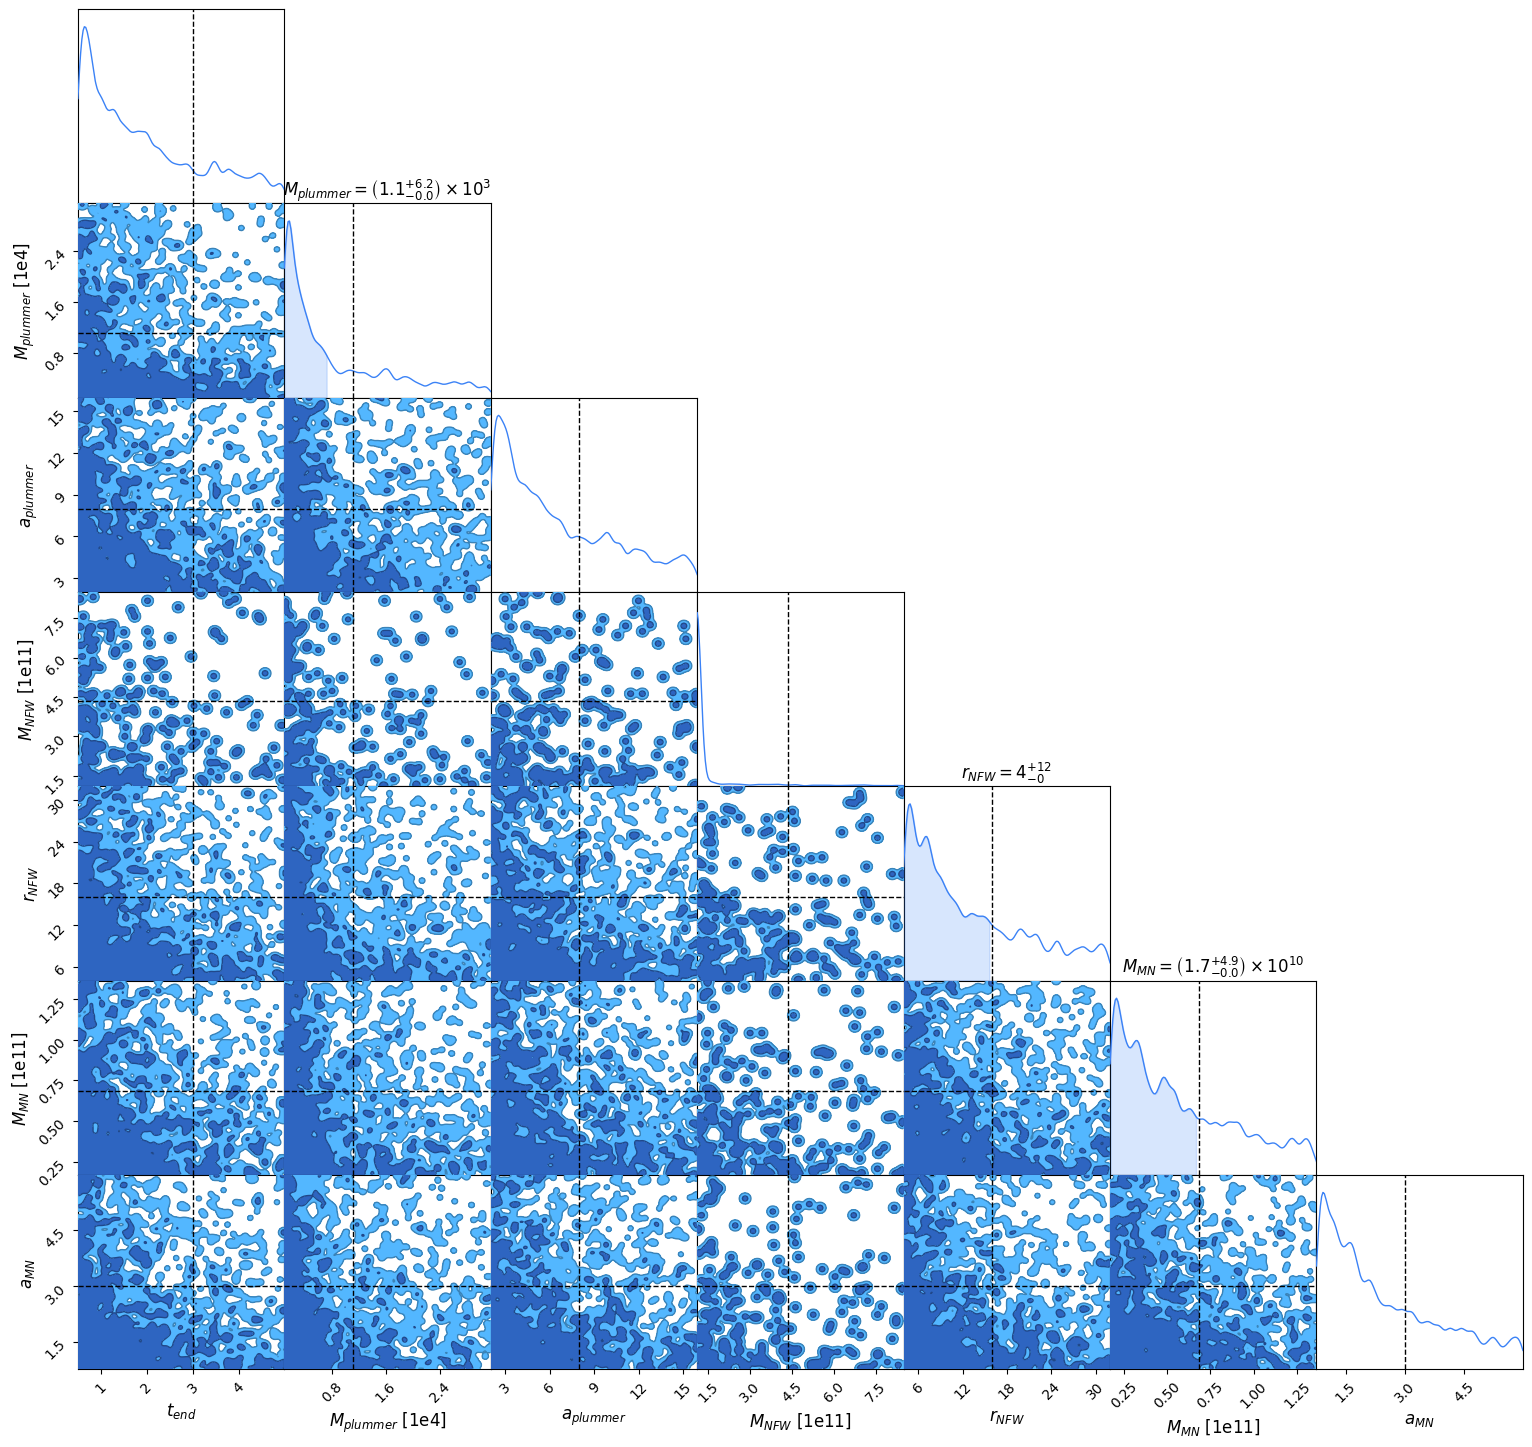

In [4]:
#plot
c = ChainConsumer()
c.add_chain(Chain(samples=df_sample, name='ScipyBoundedMinimize'))
c.add_truth(Truth(location={'$t_{end}$': params.t_end * code_units.code_time.to(u.Gyr),
                           '$M_{plummer}$': params.Plummer_params.Mtot * code_units.code_mass.to(u.Msun),
                           '$a_{plummer}$': params.Plummer_params.a * code_units.code_length.to(u.pc),
                           '$M_{NFW}$': params.NFW_params.Mvir * code_units.code_mass.to(u.Msun),
                           '$r_{NFW}$': params.NFW_params.r_s * code_units.code_length.to(u.kpc),
                           '$M_{MN}$': params.MN_params.M * code_units.code_mass.to(u.Msun),
                           '$a_{MN}$': params.MN_params.a *code_units.code_length.to(u.kpc),}))
fig = c.plotter.plot()

# Gradient descent results

In [5]:
code_length = 10 * u.kpc
code_mass = 1e5 * u.Msun
code_time = 3 * u.Gyr
code_units = CodeUnits(code_length, code_mass, G=1, unit_time = code_time )  

# set the simulation parameters, we can differentiate with respect to these parameters
params = SimulationParams(t_end = (3 * u.Gyr).to(code_units.code_time).value,  
                          Plummer_params= PlummerParams(Mtot=(10**4.05 * u.Msun).to(code_units.code_mass).value,
                                                        a=(8 * u.pc).to(code_units.code_length).value),
                           MN_params= MNParams(M = (68_193_902_782.346756 * u.Msun).to(code_units.code_mass).value,
                                              a = (3.0 * u.kpc).to(code_units.code_length).value,
                                              b = (0.280 * u.kpc).to(code_units.code_length).value),
                          NFW_params= NFWParams(Mvir=(4.3683325e11 * u.Msun).to(code_units.code_mass).value,
                                               r_s= (16.0 * u.kpc).to(code_units.code_length).value,),      
                          PSP_params= PSPParams(M = 4501365375.06545 * u.Msun.to(code_units.code_mass),
                                                alpha = 1.8, 
                                                r_c = (1.9*u.kpc).to(code_units.code_length).value),                    
                          G=code_units.G, ) 

In [6]:
sample_dir = './sampling_gradient_descend/'
sample_files = [os.path.join(sample_dir, s) for s in os.listdir(sample_dir) if s.endswith('.npz')]
samples_all = np.array([np.load(s)['xlist'] for s in sample_files])
losses_all = np.array([np.load(s)['loss_list'] for s in sample_files])

# all_x_minimum = np.array([x[np.argmin(l)] for x, l in zip(samples_all, losses_all)])
all_x_minimum = np.array([x[-1] for x in samples_all])
print(all_x_minimum.shape)
df_sample = pd.DataFrame(all_x_minimum, columns=['$t_{end}$', '$M_{plummer}$', '$a_{plummer}$', '$M_{NFW}$', '$r_{NFW}$', '$M_{MN}$', '$a_{MN}$',])
df_sample['$t_{end}$'] = 10**df_sample['$t_{end}$'] * code_units.code_time.to(u.Gyr)
df_sample['$M_{plummer}$'] = 10**df_sample['$M_{plummer}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{plummer}$'] =10**df_sample['$a_{plummer}$'] * code_units.code_length.to(u.pc)
df_sample['$M_{NFW}$'] = 10**df_sample['$M_{NFW}$'] * code_units.code_mass.to(u.Msun)
df_sample['$r_{NFW}$'] = 10**df_sample['$r_{NFW}$'] * code_units.code_length.to(u.kpc)
df_sample['$M_{MN}$'] = 10**df_sample['$M_{MN}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{MN}$'] = 10**df_sample['$a_{MN}$'] * code_units.code_length.to(u.kpc)

(2500, 7)


Parameter $t_{end}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $r_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{MN}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{MN}$ in chain ScipyBoundedMinimize is not constrained


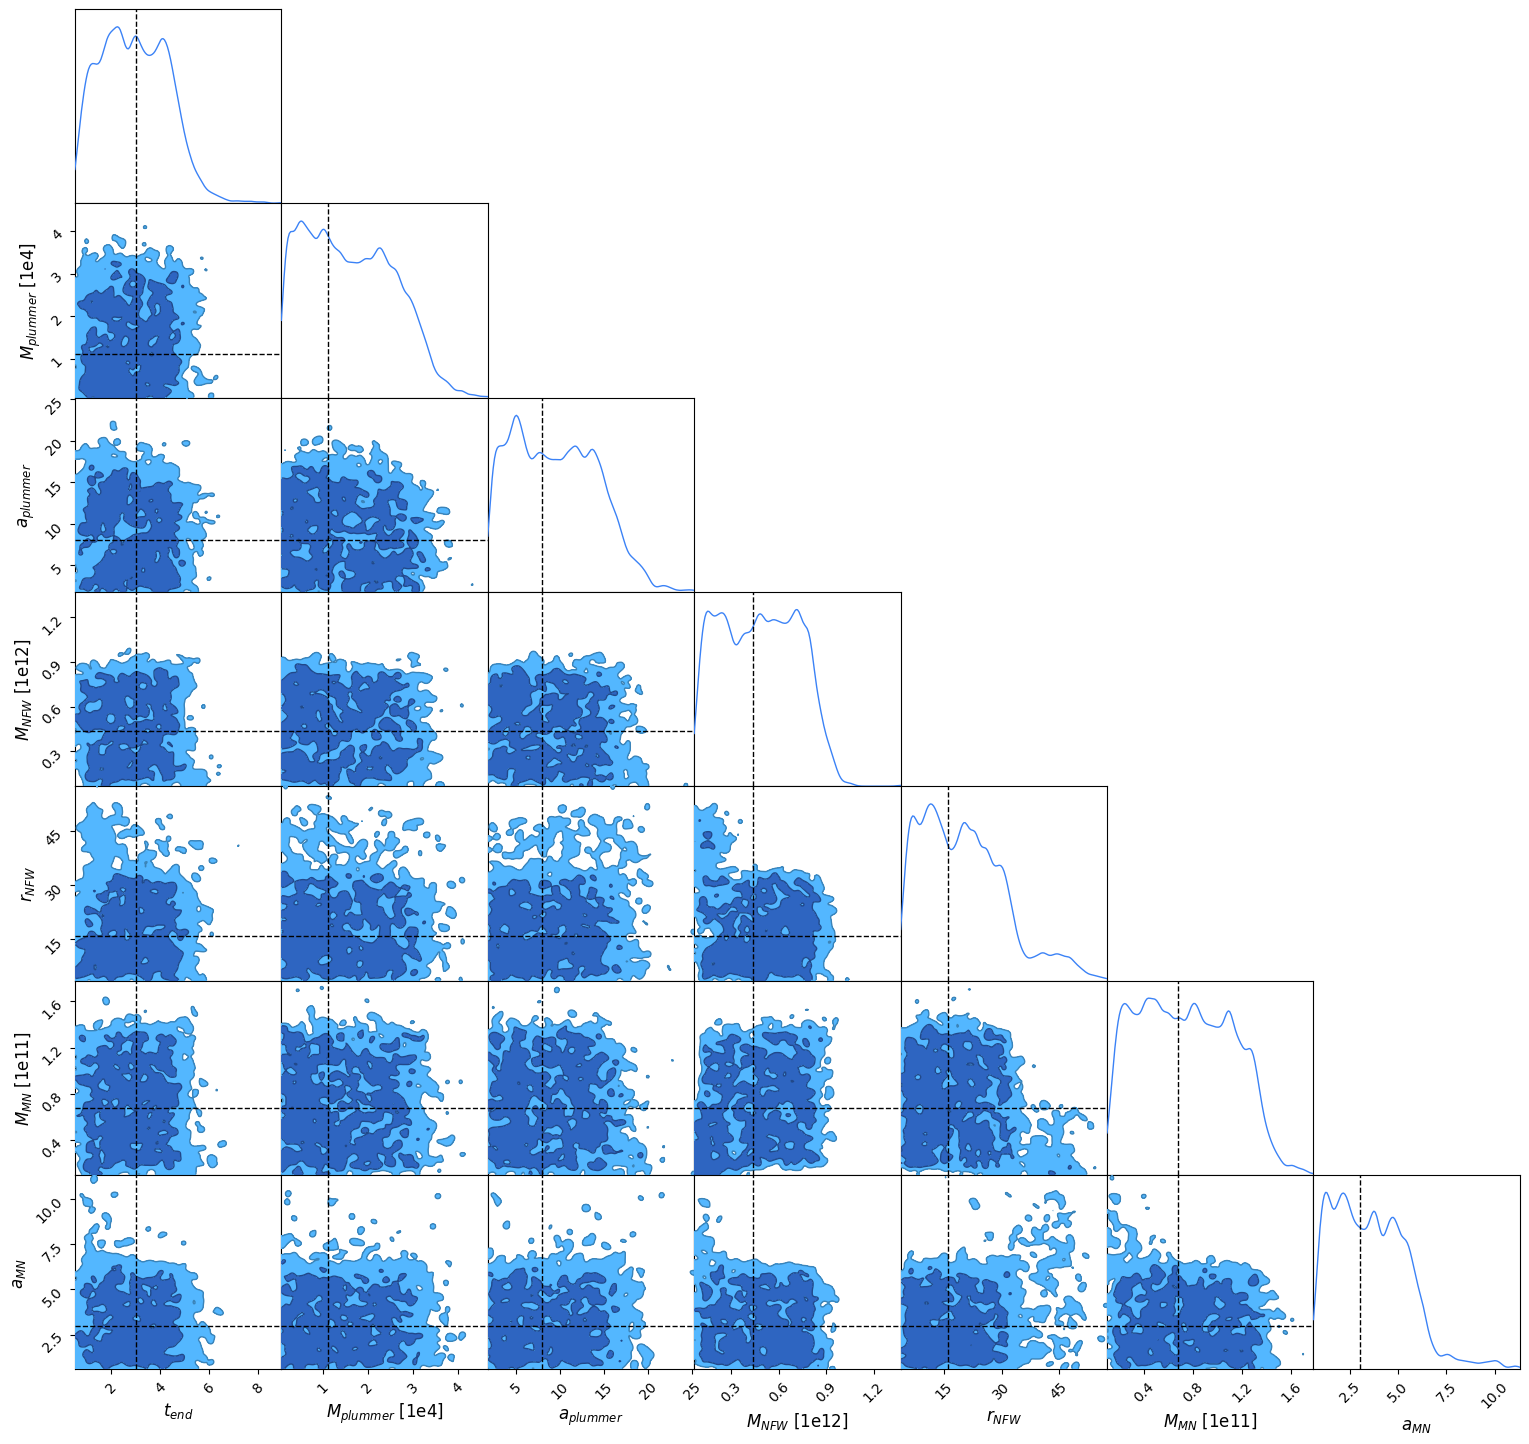

In [7]:
c = ChainConsumer()
c.add_chain(Chain(samples=df_sample, name='ScipyBoundedMinimize'))
c.add_truth(Truth(location={'$t_{end}$': params.t_end * code_units.code_time.to(u.Gyr),
                           '$M_{plummer}$': params.Plummer_params.Mtot * code_units.code_mass.to(u.Msun),
                           '$a_{plummer}$': params.Plummer_params.a * code_units.code_length.to(u.pc),
                           '$M_{NFW}$': params.NFW_params.Mvir * code_units.code_mass.to(u.Msun),
                           '$r_{NFW}$': params.NFW_params.r_s * code_units.code_length.to(u.kpc),
                           '$M_{MN}$': params.MN_params.M * code_units.code_mass.to(u.Msun),
                           '$a_{MN}$': params.MN_params.a *code_units.code_length.to(u.kpc),
                         }))
fig = c.plotter.plot()

Parameter $t_{end}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $r_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{MN}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{MN}$ in chain ScipyBoundedMinimize is not constrained


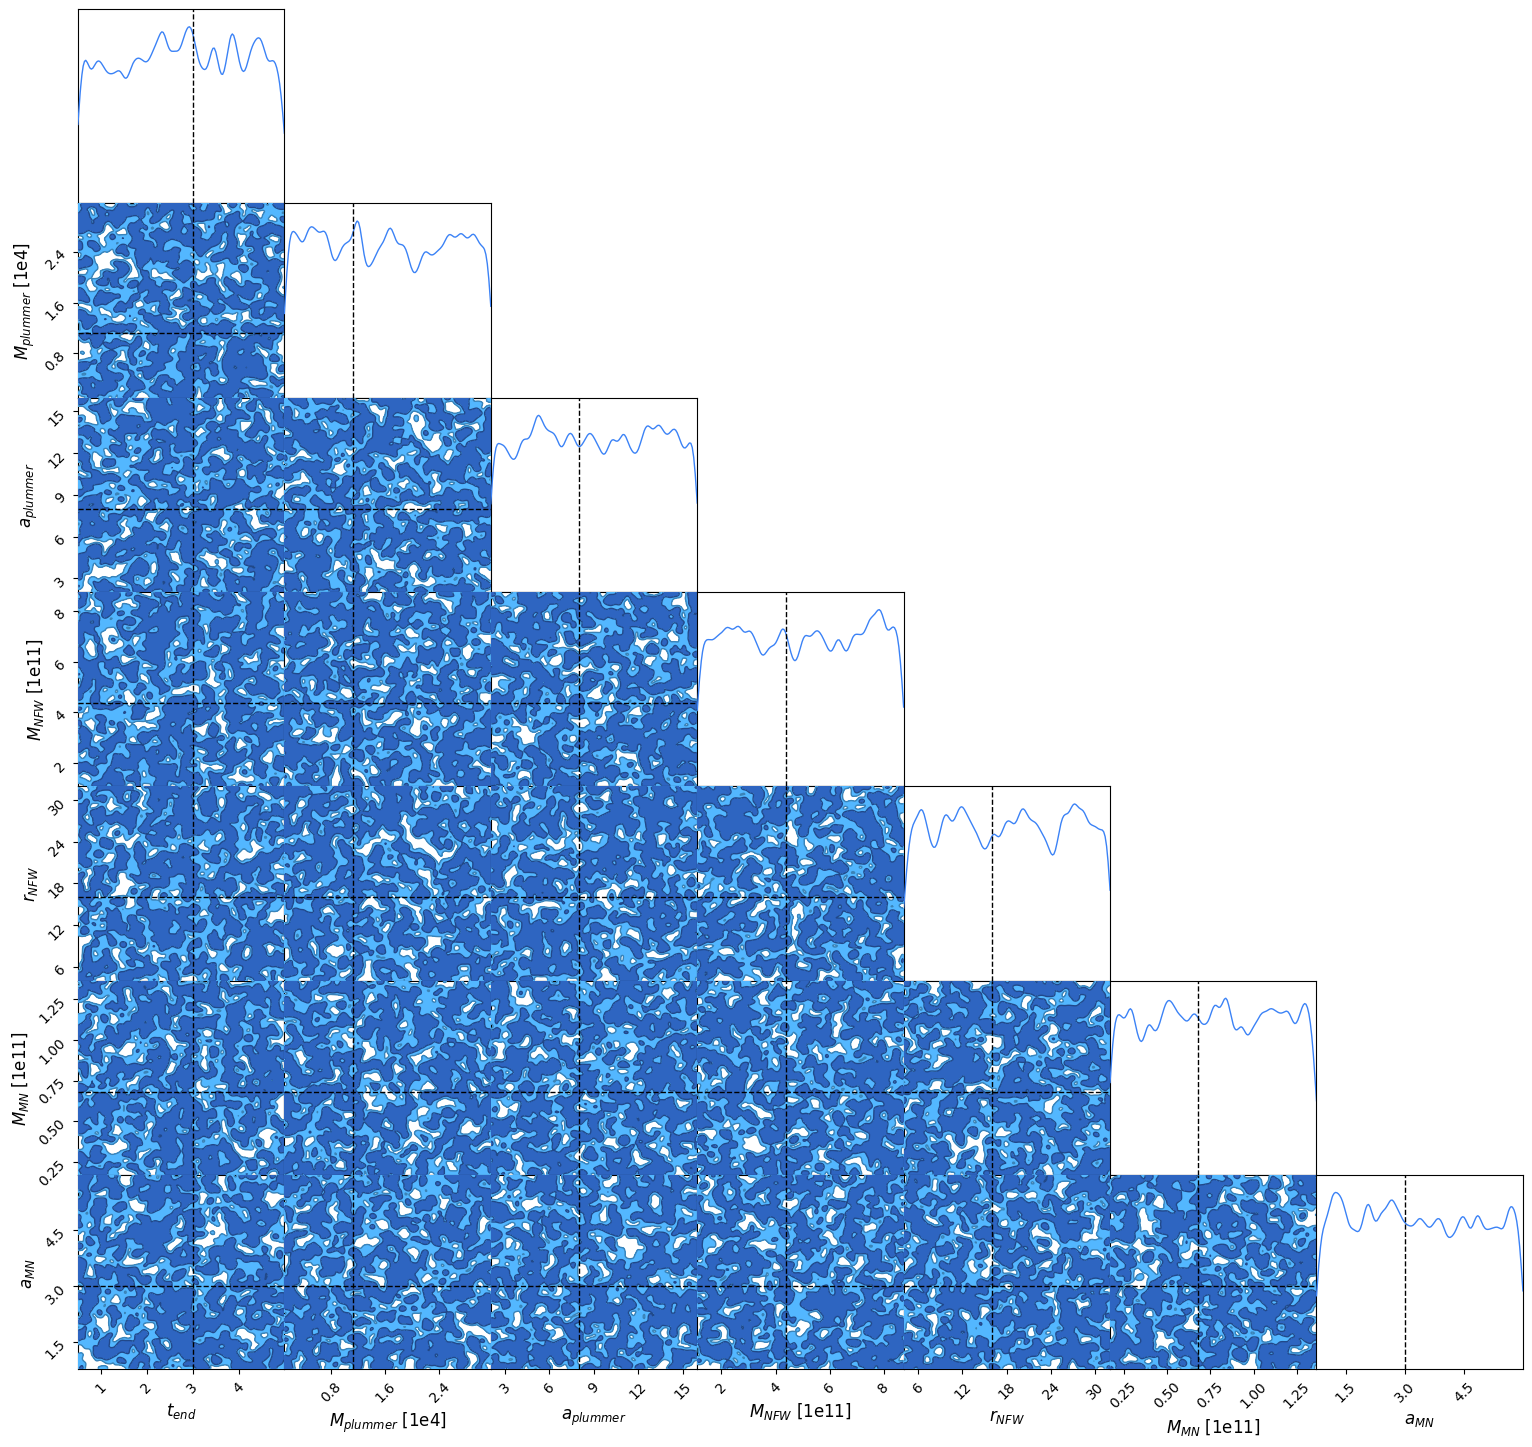

In [8]:
initial_samples= np.array([np.load(s)["parameter_value"] for s in sample_files])
df_initial = pd.DataFrame(initial_samples, columns=['$t_{end}$', '$M_{plummer}$', '$a_{plummer}$', '$M_{NFW}$', '$r_{NFW}$', '$M_{MN}$', '$a_{MN}$'])
df_initial['$t_{end}$'] = df_initial['$t_{end}$'] * code_units.code_time.to(u.Gyr)
df_initial['$M_{plummer}$'] = df_initial['$M_{plummer}$'] * code_units.code_mass.to(u.Msun)
df_initial['$a_{plummer}$'] = df_initial['$a_{plummer}$'] * code_units.code_length.to(u.pc) 
df_initial['$M_{NFW}$'] = df_initial['$M_{NFW}$'] * code_units.code_mass.to(u.Msun)
df_initial['$r_{NFW}$'] = df_initial['$r_{NFW}$'] * code_units.code_length.to(u.kpc)
df_initial['$M_{MN}$'] = df_initial['$M_{MN}$'] * code_units.code_mass.to(u.Msun)
df_initial['$a_{MN}$'] = df_initial['$a_{MN}$'] * code_units.code_length.to(u.kpc)
c = ChainConsumer()
c.add_chain(Chain(samples=df_initial, name='ScipyBoundedMinimize'))
c.add_truth(Truth(location={'$t_{end}$': params.t_end * code_units.code_time.to(u.Gyr),
                           '$M_{plummer}$': params.Plummer_params.Mtot * code_units.code_mass.to(u.Msun),
                           '$a_{plummer}$': params.Plummer_params.a * code_units.code_length.to(u.pc),
                           '$M_{NFW}$': params.NFW_params.Mvir * code_units.code_mass.to(u.Msun),
                           '$r_{NFW}$': params.NFW_params.r_s * code_units.code_length.to(u.kpc),
                           '$M_{MN}$': params.MN_params.M * code_units.code_mass.to(u.Msun),
                           '$a_{MN}$': params.MN_params.a *code_units.code_length.to(u.kpc),}))
fig = c.plotter.plot()

# ScipyMinimize varying position

In [9]:
sample_dir = './sampling_ScipyMinimize_varying_position/ScipyBoundedMinimize/new_loss'
sample_files = [os.path.join(sample_dir, s) for s in os.listdir(sample_dir)]
samples = np.array([np.load(s)['sample'] for s in sample_files])
print(samples.shape)
df_sample = pd.DataFrame(samples, columns=['$t_{end}$', '$M_{plummer}$', '$a_{plummer}$', '$M_{NFW}$', '$r_{NFW}$', '$M_{MN}$', '$a_{MN}$',
                                           'x', 'y', 'z', 'vx', 'vy', 'vz'])
df_sample['$t_{end}$'] = 10**df_sample['$t_{end}$'] * code_units.code_time.to(u.Gyr)
df_sample['$M_{plummer}$'] = 10**df_sample['$M_{plummer}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{plummer}$'] =10** df_sample['$a_{plummer}$'] * code_units.code_length.to(u.pc)
df_sample['$M_{NFW}$'] = 10**df_sample['$M_{NFW}$'] * code_units.code_mass.to(u.Msun)
df_sample['$r_{NFW}$'] = 10**df_sample['$r_{NFW}$'] * code_units.code_length.to(u.kpc)
df_sample['$M_{MN}$'] = 10**df_sample['$M_{MN}$'] * code_units.code_mass.to(u.Msun)
df_sample['$a_{MN}$'] = df_sample['$a_{MN}$'] * code_units.code_length.to(u.kpc)


(2848, 13)


Parameter $a_{plummer}$ in chain ScipyBoundedMinimize is not constrained
Parameter $r_{NFW}$ in chain ScipyBoundedMinimize is not constrained
Parameter $M_{MN}$ in chain ScipyBoundedMinimize is not constrained
Parameter $a_{MN}$ in chain ScipyBoundedMinimize is not constrained
Parameter x in chain ScipyBoundedMinimize is not constrained
Parameter y in chain ScipyBoundedMinimize is not constrained
Parameter z in chain ScipyBoundedMinimize is not constrained
Parameter vx in chain ScipyBoundedMinimize is not constrained
Parameter vy in chain ScipyBoundedMinimize is not constrained
Parameter vz in chain ScipyBoundedMinimize is not constrained


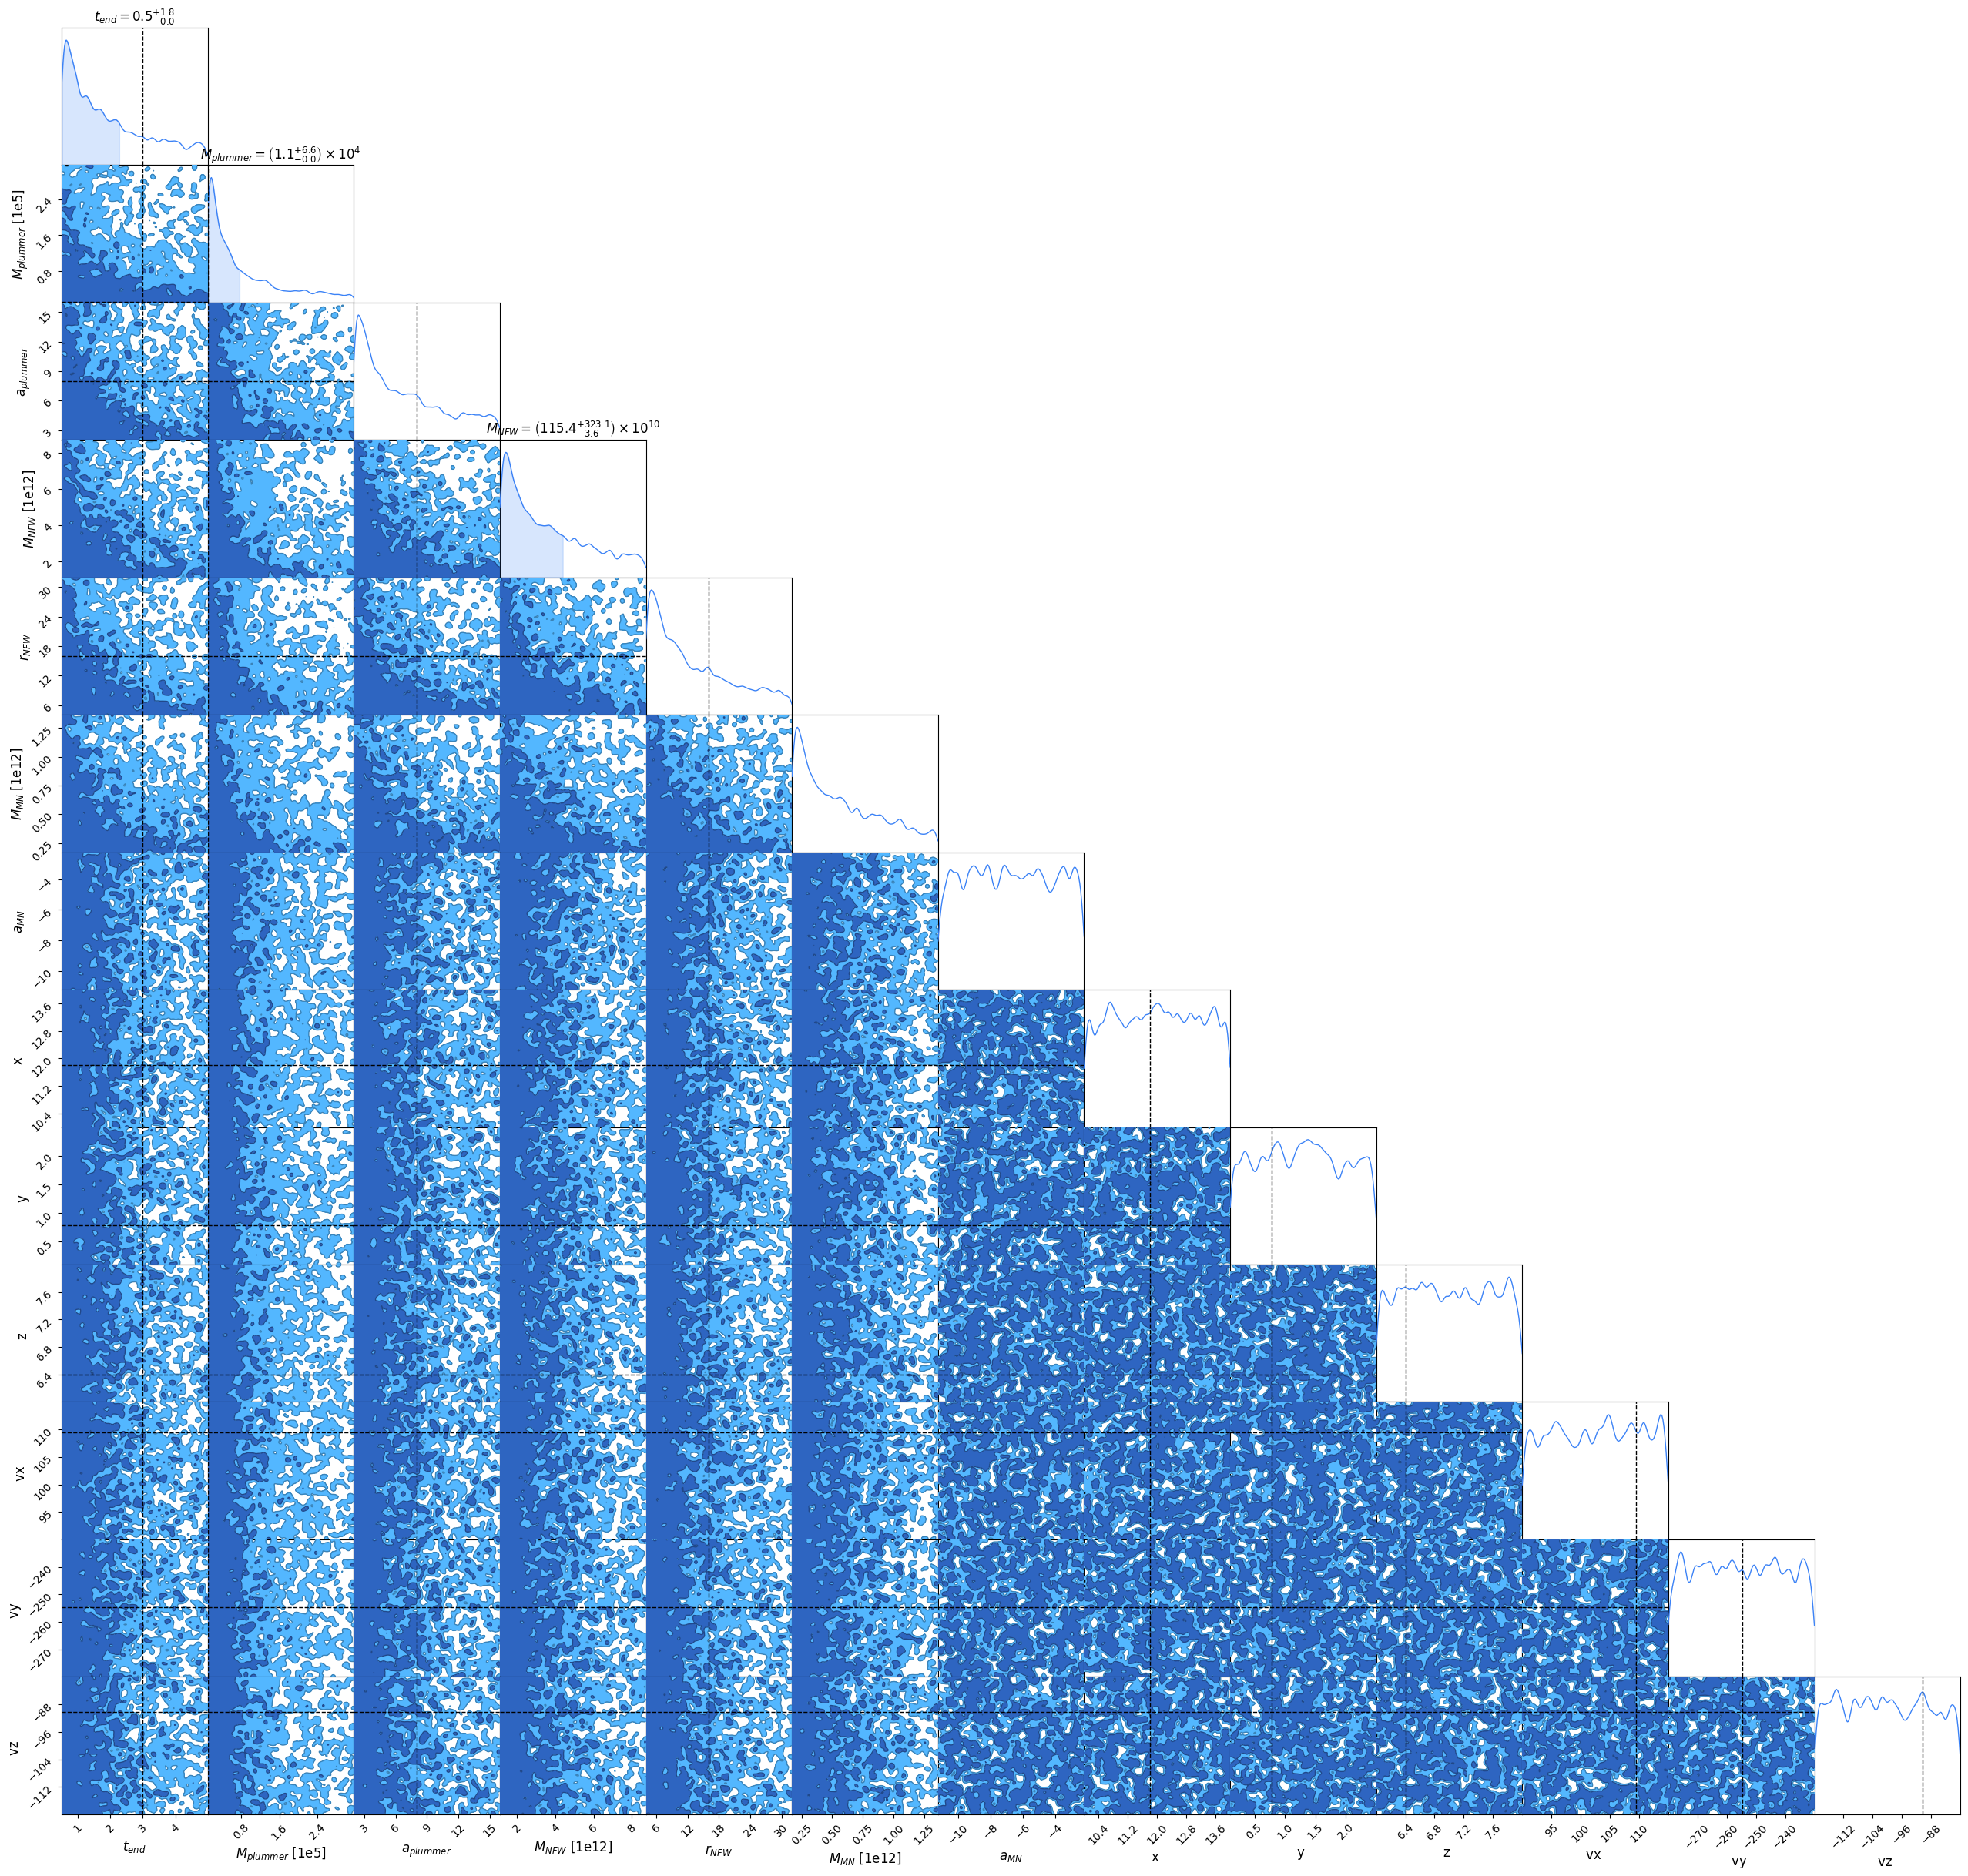

In [10]:
#plot
c = ChainConsumer()
c.add_chain(Chain(samples=df_sample, name='ScipyBoundedMinimize'))
c.add_truth(Truth(location={'$t_{end}$': params.t_end * code_units.code_time.to(u.Gyr),
                           '$M_{plummer}$': params.Plummer_params.Mtot * code_units.code_mass.to(u.Msun),
                           '$a_{plummer}$': params.Plummer_params.a * code_units.code_length.to(u.pc),
                           '$M_{NFW}$': params.NFW_params.Mvir * code_units.code_mass.to(u.Msun),
                           '$r_{NFW}$': params.NFW_params.r_s * code_units.code_length.to(u.kpc),
                           '$M_{MN}$': params.MN_params.M * code_units.code_mass.to(u.Msun),
                           '$a_{MN}$': params.MN_params.a *code_units.code_length.to(u.kpc),
                            'x': 11.8, #x can be left in kpc
                            'y': 0.79, #y
                            'z': 6.4, #z
                            'vx': 109.5, #vx can be left in km/s
                            'vy':-254.5, #vy
                            'vz':-90.3
                         }))
fig = c.plotter.plot()